In [259]:
import spacy
import sklearn.cluster as cluster
import scipy.spatial.distance as sdist

In [210]:
nlp = spacy.load('en')

In [211]:
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
import unidecode
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [214]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
data = pd.read_csv('/Users/rahulsharma/dataset 2/news.csv')
df = data.copy()
tempp = df.copy()


In [215]:
remove_digits = True
pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'

In [216]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

In [217]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

In [218]:
def remove_special_characters(text, remove_digits=True):
    text = re.sub(pattern, '', text)
    return text

In [219]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [220]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [221]:
tempp['full_text'] = tempp['headline'].map(str)+ '. ' + tempp['text']

In [223]:
for index, row in tempp.iterrows():
    strip_text = strip_html_tags(row['full_text'])
    remove_acc = remove_accented_chars(strip_text)
    remove_spe = remove_special_characters(remove_acc)
    remove_sto = remove_stopwords(remove_spe)
    row['full_text'] = remove_sto

In [225]:
tempp['full_text'][2]

u'Election Heres Mate downunder perspective Australia United States choice Everywhere look many options huge variety breakfast cereals average American supermarket enough make feel like Ive escaped Soviet Union circa presidential politics spectrum candidates political ideologies choose positively dazzlingBy contrast Aussie politicians mostly tend follow Henry Ford principle slightly modified color like long beigeWe recently election whole thing like pretty beige precisely two candidates barely distinguishable except one headed Liberal Party main conservative group candidate Labor founded union movement entire federal election campaign lasted exactly six weeks long slog according pundits voters alike month people moaning want overSo see us Aussies twoyear process candidate announcements Inauguration Day might seem tad excessive not downright well absurdThis past summer Iowa chance size current crop US presidential candidates wonder Earth youre going choose diverse field ever wouldbe pre

In [252]:
text_content = tempp['full_text']
vector = TfidfVectorizer()
tfidf = vector.fit_transform(text_content)

In [253]:
tfidf.shape

(3000, 39489)

In [206]:
for index, row in tempp.iterrows():

u'Market Advances NEW YORK AP prime rate reduction New Yorks First National City Bank helped stock market close busiest week history modest advance FridayThe Dow Jones average industrial stocks gained finishing week withanetrise pointsBig Board volume million shares fell good deal short matching Thursdays alltime high millionBut days figure enough push total week record million shares previous peak million last week January Dow advanced two first sessions new year Fridays close gained points since New Years'

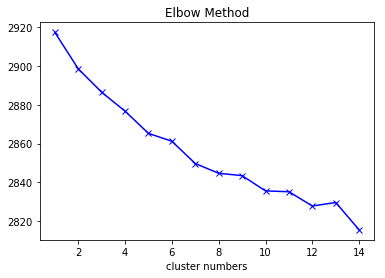

In [242]:
K = range(1,15)
SSE = []
for k in K:
    kmeans = MiniBatchKMeans(n_clusters = k,batch_size = 300)
    kmeans.fit(tfidf)
    SSE.append(kmeans.inertia_)
    
import matplotlib.pyplot as plt
plt.plot(K,SSE,'bx-')
plt.title('Elbow Method')
plt.xlabel('cluster numbers')
plt.show()

In [254]:
kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(tfidf)

In [267]:
terms = vector.get_feature_names
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf)
dist

In [271]:
np.savetxt('distmat.txt',dist)

In [257]:
tempp['cluster'] = kmeans.labels_

In [273]:
import matplotlib as mpl
from sklearn.manifold import MDS
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

In [ ]:
#k = 3
#kmeans = MiniBatchKMeans(n_clusters = k)
#kmeans.fit(tfidf)
#centers = kmeans.cluster_centers_.argsort()[:,::-1]
#terms = vector.get_feature_names()

for i in range(0,k):
    word_list=[]
    print("cluster%d:"% i)
    for j in centers[i,:15]:
        word_list.append(terms[j])
    print(word_list) 

In [244]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer

df['full_text'] = df['headline'].map(str)+ '. ' + df['text']

In [175]:
full_text = df['full_text']
news_text = df['text']
headline_text = df['headline']
Y_full_text = vector.transform(full_text)
Y_news_text = vector.transform(news_text)
Y_headline_text = vector.transform(headline_text)
prediction_full_text = kmeans.predict(Y_full_text)
prediction_news_text = kmeans.predict(Y_news_text)
prediction_headline_text = kmeans.predict(Y_headline_text)

In [202]:
centroids = kmeans.cluster_centers_
centroids.shape

(3, 39301)

In [176]:
df['clusters_full_text'] = prediction_full_text
df['clusters_news_text'] = prediction_news_text
df['clusters_headline_text'] = prediction_headline_text

In [177]:
df['clusters_full_text'].value_counts()

1    2185
2     567
0     248
Name: clusters_full_text, dtype: int64

In [178]:
df['clusters_news_text'].value_counts()

1    2181
2     565
0     254
Name: clusters_news_text, dtype: int64

In [179]:
df['clusters_headline_text'].value_counts()

1    2781
2     200
0      19
Name: clusters_headline_text, dtype: int64

In [185]:
kmeans.cluster_centers_.shape

(3, 39301)

In [90]:
kmeans.compute_labels


True

In [181]:
t = kmeans.cluster_centers_

In [134]:
np.savetxt('test_clusters_final.txt', t)

In [138]:
d={'id':data['id'],'cluster':df['clusters_full_text']}
ans=pd.DataFrame(d)
ans.to_csv('Clustering_Financial-Articles.csv',index=True)

In [140]:
dff = pd.read_csv('/Users/rahulsharma/Teams/Clustering-Financial-Articles.csv')

In [141]:
def swap_columns(df, c1, c2):
    df['temp'] = df[c1]
    df[c1] = df[c2]
    df[c2] = df_organizations['temp']
    df.drop(columns=['temp'], inplace=True)

In [149]:
dff['Cluster'] = dff['cluster']

In [151]:
dff.drop({'cluster'},axis=1,inplace=True)

In [153]:
dff = dff.rename(columns={'Cluster': 'cluster'})

In [155]:
dff.to_csv('Final-Clustering-Financial-Articles.csv', index=False)

In [182]:
t.shape

(3, 39301)

In [183]:
tfidf.shape

(3000, 39301)

In [184]:
vector

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [ ]:
kmeans = cluster.KMeans(n_clusters=5, random_state=0).fit(t)
tempp['cluster'] = kmeans.labels_

centroids = kmeans.cluster_centers_
dists = pd.DataFrame(
    sdist.cdist(points, centroids), 
    columns=['dist_{}'.format(i) for i in range(len(centroids))],
    index=df.index)
df = pd.concat([df, dists], axis=1)

print(df)